# 네이버 영화 리뷰 스크래핑

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import pandas as pd

def get_movie_reviews(mcode, page_num=10):

  movie_review_df = pd.DataFrame(columns=("Title", "Score", "Review"))

  url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=" + str(mcode) + "&target=after"

  idx = 0

  for _ in range(0, page_num):
    movie_page = urllib.request.urlopen(url).read()
    movie_page_soup = BeautifulSoup(movie_page, 'html.parser')

    review_list = movie_page_soup.find_all('td', {'class' : 'title'})

    for review in review_list:
      title = review.find('a', {'class' : 'movie color_b'}).get_text()
      score = review.find('em').get_text()
      review_text = review.find('a', {'class' : 'report'}).get('onclick').split(',')[2]
      movie_review_df.loc[idx] = [title, score, review_text]
      idx += 1
      print("#", end="")

    try:
      url = "https://movie.naver.com" +movie_page_soup.find('a', {'class' : 'pg_next'}).get('href')
    except:
      break

  return movie_review_df



In [ ]:
movie_review_df = get_movie_reviews(187310, 1)
movie_review_df

##########

,Title,Score,Review
0,미나리,10,'슬픔과 아름다움이 잘 짜여진 '
1,미나리,10,'최고의 할머니 상. 자신을 불태워 가족이 재가 되는 것을 막아 표창합니다.'
2,미나리,10,'40 생에 리뷰라는 걸 처음 쓰게 만든 영화. 보는 중에는 잘 참을 수 있었는데
3,미나리,6,'백인 할아버지들
4,미나리,10,'스토리 자체는 그냥 잔잔함. 한국적이면서도 미국적인 되게 독특한 영화임. 전 윤...
5,미나리,10,'윤여정의 연기가 신의 한수'
6,미나리,2,'ㅎ....뭐지 도대체 내가 뭘 본걸까요 '
7,미나리,9,'저런 삶이 어딘가 꼭 존재하고
8,미나리,10,'저는 결말이 마음에 들었습니다. 행복이나 성공으로 끝나는 결론보다는 그들 삶의 ...
9,미나리,10,''


In [ ]:
movie_review_df.to_csv('minariReview.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/webScraping/minariReview.csv')

,Title,Score,Review
0,미나리,10,'행복한 우리내 이야기 사랑합니다'
1,미나리,6,''
2,미나리,10,'자식같은채소들은불탔지만..제이콥은 사랑하는가족들을다시찾았다'
3,미나리,10,'잔잔하고 현실적이었어요. 가족이라는 이름의 무게가 느껴졌습니다.'
4,미나리,4,'생각보단 전체적으로 허술한점이 많네요연기도 와닫지 않고요 서양사람한테는 감동이...
...,...,...,...
3300,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3301,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3302,미나리,9,'내밀하고 진솔한 경험이 우리 삶의 놀라운 찬가가 되다.'
3303,미나리,10,'미국은 애초에 태생적으로 “이민자”의 나라다.. 아메리칸 드림을 이뤄내고자 하는...


# 영화리뷰 키워드분석

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.


In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/webScraping/minariReview.csv')
df

,Title,Score,Review
0,미나리,10,'행복한 우리내 이야기 사랑합니다'
1,미나리,6,''
2,미나리,10,'자식같은채소들은불탔지만..제이콥은 사랑하는가족들을다시찾았다'
3,미나리,10,'잔잔하고 현실적이었어요. 가족이라는 이름의 무게가 느껴졌습니다.'
4,미나리,4,'생각보단 전체적으로 허술한점이 많네요연기도 와닫지 않고요 서양사람한테는 감동이...
...,...,...,...
3300,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3301,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3302,미나리,9,'내밀하고 진솔한 경험이 우리 삶의 놀라운 찬가가 되다.'
3303,미나리,10,'미국은 애초에 태생적으로 “이민자”의 나라다.. 아메리칸 드림을 이뤄내고자 하는...


In [ ]:
reviews_list = list(df['Review'].tolist())
reviews_list

[" '행복한 우리내 이야기 사랑합니다'",
 " ''",
 " '자식같은채소들은불탔지만..제이콥은 사랑하는가족들을다시찾았다'",
 " '잔잔하고 현실적이었어요. 가족이라는 이름의 무게가 느껴졌습니다.'",
 " '생각보단  전체적으로 허술한점이 많네요연기도 와닫지 않고요 서양사람한테는 감동이있었나보네요  그정도의 연기는 우리나라 조연급들이 누구나 할수있을것같네요'",
 " '삶의희망. 구원 을 이야기하는.  기독교적 색채.  '",
 " '자전적 에세이를 영상으로 읽은 기분입니다. 윤여정 선생님의 말씀처럼 실제 겪은일을 이길 수는 없네요.제 어린시절이 떠오르기도 하고",
 " '다들 살아 숨쉬고있는 느낌'",
 " '잔잔한 감동 . 배우 윤여정님의 연기 . 이민1세대의 아픔 리얼하게 느껴졌습니다 . '",
 " '외국에서 살아본적이 없어서 그러는데",
 " '연기력으로 끌고가는 영화'",
 " '기대보다는 약하지만 재밌었어요 어릴 적에 외국에서 생활 해 본 사람은 특히 공감할 것 같습니다. '",
 " '기대 이하였습니다 생각보다 감흥이없네요'",
 " ''",
 " '처음엔 되게 지루한 영화인 줄 알았는데 미나리에 되게 깊은 뜻이 담겨있네요 ㅎㅎ 재미있게 잘 봤어요'",
 " '배우들 연기",
 " '뭐라고 말해야 할지 모르겠어요. 엄청 울었고",
 " '영화가 선명한 색깔  굵은 스토리라인 똑부러진 결말이 있어야하나? 그런거 없어도  각자의 목소리를 들려주고  정신없이 달려가는 중에 곁을 잠시 돌아보게하는 잔잔하고 담백한 영화라 좋았다 더불어 배우들의 연기도 영화의 몰입을 높였다'",
 " '뭘 말하려는건지? 내용도 없고 감동도 없고 그냥 전원일기 미국판 보고 온 느낌.X노잼'",
 " '예전 어머니 또는 할머니의 감성을 느끼는 따뜻한 영화였습미다.'",
 " '개 쓰레기같은 영화언론플레이에 완전 속았음이것도 영화라고 만들었냐'",
 " '잔잔한 울림을 주는 영화'",
 " '잔잔함 속에서  감동을",
 " '가족영화 잔잔한 드라마 좋아하시는분들 괜찮을듯

## 형태소 분석을 이용한 명사 추출

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []

for review in reviews_list:
  for noun in tagger.nouns(review):
    nouns.append(noun)

nouns[:10]

['행복', '우리', '내', '이야기', '사랑', '자식', '채소', '제이콥', '사랑', '가족']

## 불용어 사전 만들기

In [ ]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 미나리'
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '미나리']


## 불용어 제거하고 형태소 분석 수행

In [ ]:
nouns = []

for review in reviews_list:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['행복', '우리', '이야기', '사랑', '자식', '채소', '제이콥', '사랑', '가족', '현실']

## 단어 빈도 수 측정

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(200))
top_nouns

{'가슴': 52,
 '가정': 33,
 '가족': 395,
 '간': 19,
 '갈등': 31,
 '감독': 71,
 '감동': 368,
 '감사': 29,
 '감상': 16,
 '감성': 26,
 '감정': 65,
 '개봉': 22,
 '개인': 42,
 '건지': 29,
 '결국': 17,
 '결말': 109,
 '경험': 24,
 '고생': 18,
 '곳': 28,
 '공감': 98,
 '관객': 19,
 '관람': 21,
 '그': 30,
 '극': 27,
 '극장': 34,
 '기대': 236,
 '기분': 25,
 '기생충': 39,
 '기승전결': 15,
 '기억': 34,
 '나라': 29,
 '날': 23,
 '남자': 23,
 '내용': 80,
 '년': 30,
 '노': 18,
 '누구': 27,
 '눈': 23,
 '눈물': 88,
 '느낌': 113,
 '다큐': 22,
 '대': 16,
 '대사': 45,
 '데': 47,
 '데이빗': 73,
 '독립영화': 34,
 '돈': 32,
 '뒤': 16,
 '드라마': 35,
 '땅': 32,
 '때문': 34,
 '마무리': 20,
 '마음': 123,
 '마지막': 77,
 '메세지': 25,
 '모두': 23,
 '모습': 89,
 '몰입': 49,
 '무엇': 31,
 '물': 22,
 '뭔가': 60,
 '뭘': 30,
 '미': 20,
 '미국': 160,
 '미국인': 20,
 '발음': 17,
 '배': 20,
 '배경': 28,
 '배우': 237,
 '법': 19,
 '보편': 24,
 '부모': 44,
 '부부': 29,
 '부분': 69,
 '부족': 31,
 '뿌리': 19,
 '사건': 18,
 '사람': 133,
 '사랑': 56,
 '삶': 151,
 '상': 74,
 '상황': 27,
 '생각': 267,
 '생명력': 17,
 '생활': 36,
 '선생': 19,
 '성공': 15,
 '세대': 41,
 '세상': 16,
 '속': 63,
 '손자': 1

## 단어 빈도 시각화

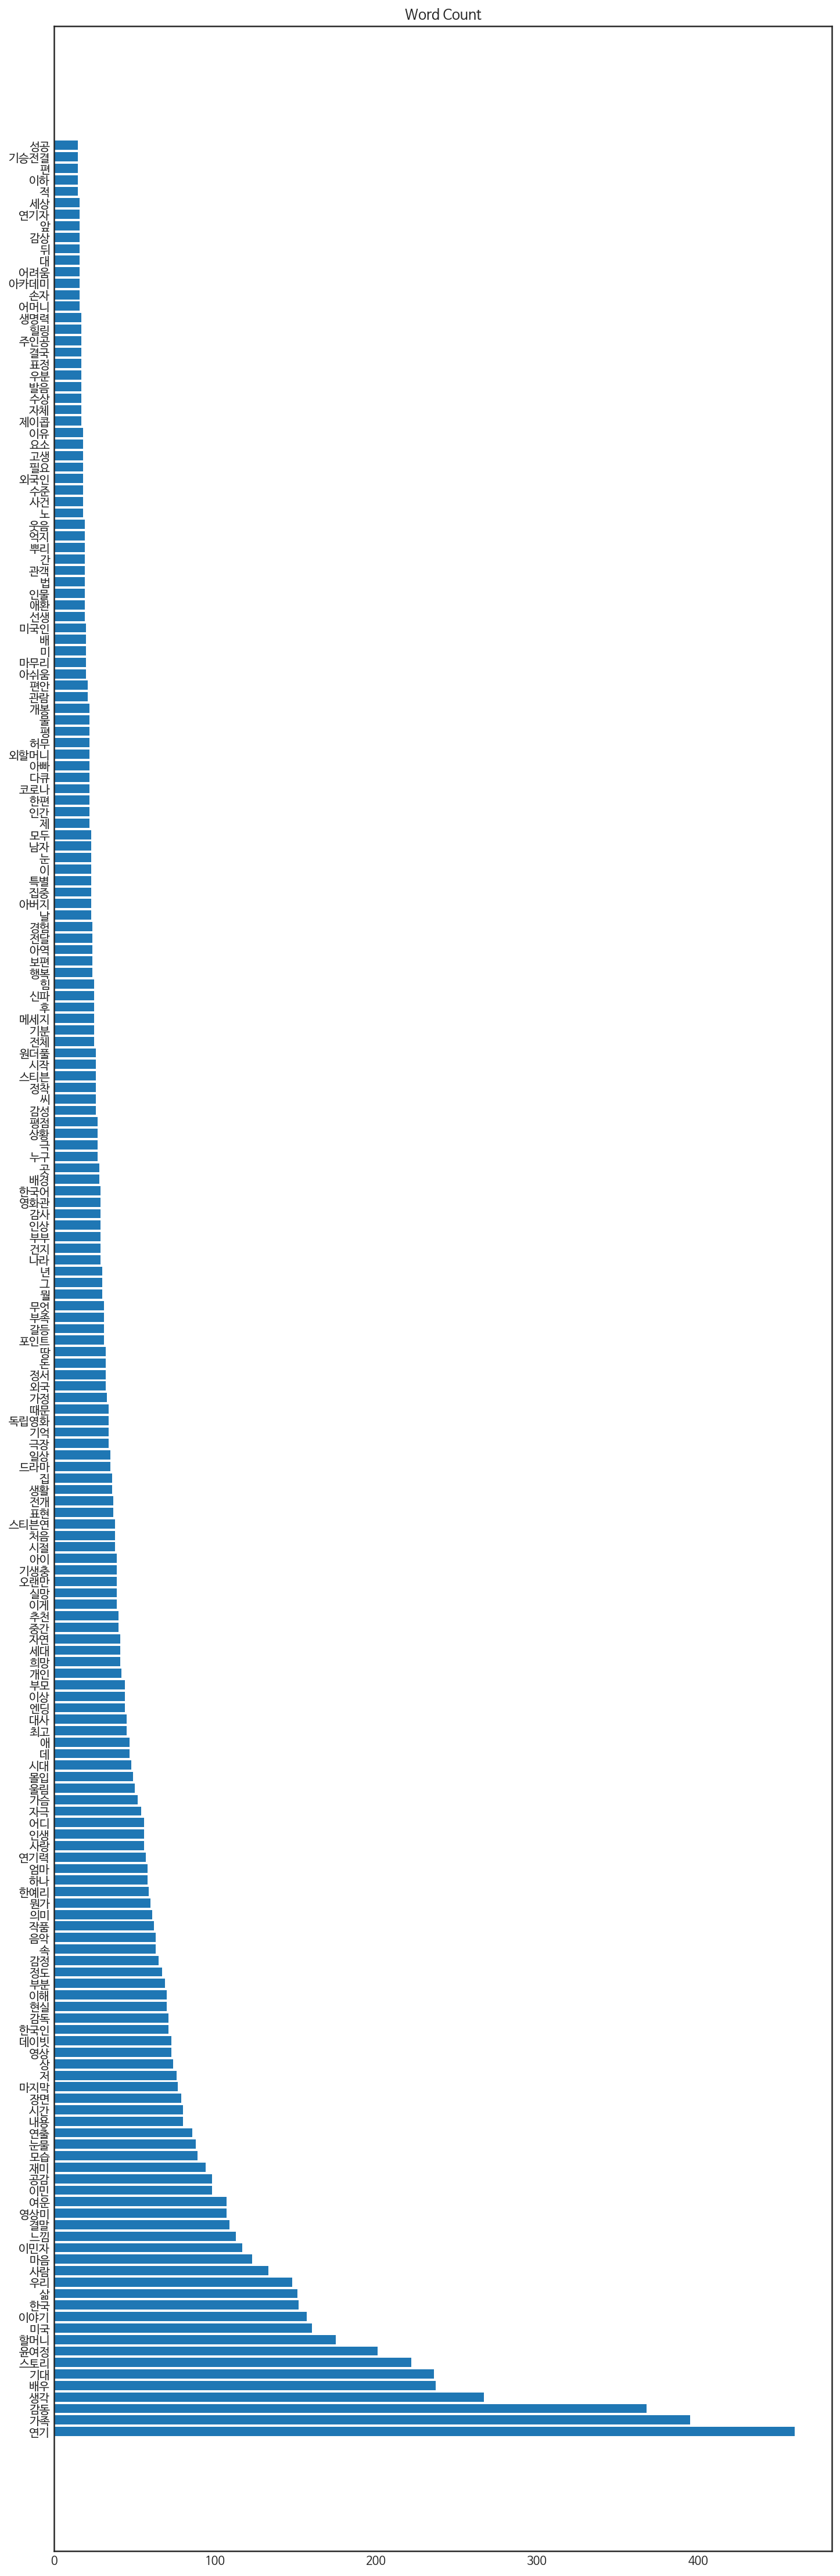

In [ ]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 40))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드 클라우드

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

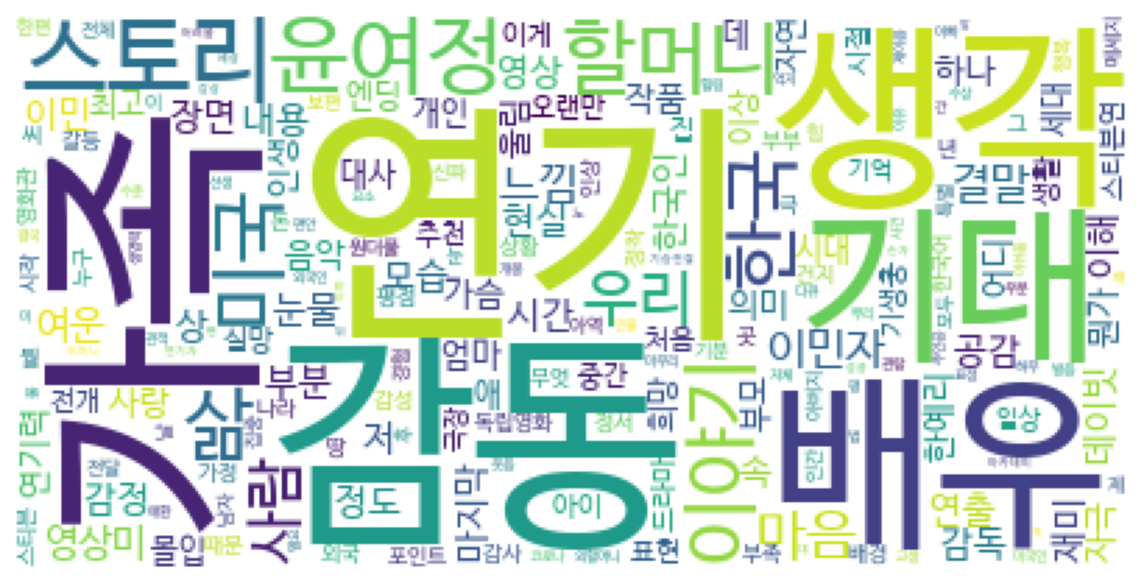

In [ ]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)

## squarify 트리맵 시각화

In [ ]:
!pip install squarify

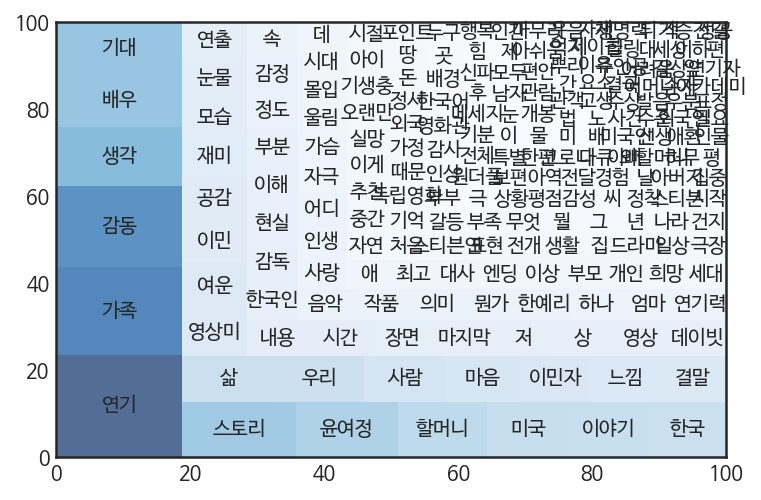

In [ ]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                               vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);

# 영화 리뷰 감성분석 with konlpy, soynlp

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/webScraping/minariReview.csv')
df

,Title,Score,Review
0,미나리,10,'행복한 우리내 이야기 사랑합니다'
1,미나리,6,''
2,미나리,10,'자식같은채소들은불탔지만..제이콥은 사랑하는가족들을다시찾았다'
3,미나리,10,'잔잔하고 현실적이었어요. 가족이라는 이름의 무게가 느껴졌습니다.'
4,미나리,4,'생각보단 전체적으로 허술한점이 많네요연기도 와닫지 않고요 서양사람한테는 감동이...
...,...,...,...
3300,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3301,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...
3302,미나리,9,'내밀하고 진솔한 경험이 우리 삶의 놀라운 찬가가 되다.'
3303,미나리,10,'미국은 애초에 태생적으로 “이민자”의 나라다.. 아메리칸 드림을 이뤄내고자 하는...


In [ ]:
df['Sentiment'] = np.where(df['Score'] > 5, 1, 0)
df

,Title,Score,Review,Sentiment
0,미나리,10,'행복한 우리내 이야기 사랑합니다',1
1,미나리,6,'',1
2,미나리,10,'자식같은채소들은불탔지만..제이콥은 사랑하는가족들을다시찾았다',1
3,미나리,10,'잔잔하고 현실적이었어요. 가족이라는 이름의 무게가 느껴졌습니다.',1
4,미나리,4,'생각보단 전체적으로 허술한점이 많네요연기도 와닫지 않고요 서양사람한테는 감동이...,0
...,...,...,...,...
3300,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...,1
3301,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...,1
3302,미나리,9,'내밀하고 진솔한 경험이 우리 삶의 놀라운 찬가가 되다.',1
3303,미나리,10,'미국은 애초에 태생적으로 “이민자”의 나라다.. 아메리칸 드림을 이뤄내고자 하는...,1


* https://github.com/google-research/bert

In [ ]:
train_df = df.sample(frac=0.7, random_state=777).reset_index(drop=True)
train_df

,Title,Score,Review,Sentiment
0,미나리,10,'한국적이지만 절제된 드라마 세련된 영상미 감각적인 음악',1
1,미나리,10,'7번방처럼 할머니 붙잡고 눈물 질질흘리게 하면 감동영화라며 평점 주겠지',1
2,미나리,8,'보고나니 아름다기도 하고 먹먹하네요.',1
3,미나리,8,'',1
4,미나리,6,'연기 보는 맛이 살아 있습니다. 윤여정,1
...,...,...,...,...
2309,미나리,7,'잔잔한 흐름이 은근히 몰입되게 만들었음. 특별한 연출력은 아니였던것 같으나,1
2310,미나리,10,'따뜻한 가족 이야기 윤여정 한예리 아카데미연기상 기원합니다 주제가도 좋아요먹먹하...,1
2311,미나리,8,'생각하게하는 영화네요~',1
2312,미나리,8,'아주평범한것 같아서 밋밋한 영화같아요',1


In [ ]:
test_df = df.drop(train.index).reset_index(drop=True)
test_df

,Title,Score,Review,Sentiment
0,미나리,4,'솔직히 크게 연기력을 극찬할만한 영화는 아닌듯 그정도로 연기할만한 배우도 여러명...,0
1,미나리,10,'보고 있는 내내 하루종일도 볼 수 있겠다 싶을 정도로 몽글몽글한 기분이 들게 하...,1
2,미나리,8,'연기와 연출로 밥차리고 결말로 재뿌렸다',1
3,미나리,8,'봉준호감독의 기생충으로 한국영화가 세계적인 관심을 받았기에 미나리가 기대이상으로...,1
4,미나리,1,'제발 이제 제작비하고 영화 표값 하고 조절해서 받으면 안되냐?? 진짜 만3천...,0
...,...,...,...,...
986,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...,1
987,미나리,10,'하.... 이것이 제 심사평입니다. 이런 게 바로 영화 아니겠습니다. 오늘 하...,1
988,미나리,9,'내밀하고 진솔한 경험이 우리 삶의 놀라운 찬가가 되다.',1
989,미나리,10,'미국은 애초에 태생적으로 “이민자”의 나라다.. 아메리칸 드림을 이뤄내고자 하는...,1


In [ ]:
#!pip install konlpy soynlp

In [ ]:
import konlpy

In [ ]:
X_train = train_df['Review'].values
y_train = train_df['Sentiment'].values

In [ ]:
X_test = test_df['Review'].values
y_test = test_df['Sentiment'].values

In [ ]:
print(len(X_train), np.bincount(y_train))

2314 [ 318 1996]


In [ ]:
print(len(X_test), np.bincount(y_test))

991 [113 878]


In [ ]:
from konlpy.tag import Okt

okt = Okt()
print(X_train[4])
print(okt.morphs(X_train[4]))

 '연기 보는 맛이 살아 있습니다. 윤여정
["'", '연기', '보는', '맛', '이', '살', '아', '있습니다', '.', '윤여정']


In [ ]:
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer

if not os.path.isfile('okt_train.npz'):
    tfidf = TfidfVectorizer(ngram_range=(1, 2), 
                            min_df=3,
                            max_df=0.9,
                            tokenizer=okt.morphs, 
                            token_pattern=None)
    tfidf.fit(X_train)
    X_train_okt = tfidf.transform(X_train)
    X_test_okt = tfidf.transform(X_test)
    save_npz('okt_train.npz', X_train_okt)
    save_npz('okt_test.npz', X_test_okt)
else:
    X_train_okt = load_npz('okt_train.npz')
    X_test_okt = load_npz('okt_test.npz')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.utils.fixes import loguniform

sgd = SGDClassifier(loss='log', random_state=1)
param_dist = {'alpha': loguniform(0.0001, 100.0)}

rsv_okt = RandomizedSearchCV(estimator=sgd,
                             param_distributions=param_dist,
                             n_iter=50,
                             random_state=1,
                             verbose=1)
rsv_okt.fit(X_train_okt, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=1,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'a

In [ ]:
print(rsv_okt.best_score_)
print(rsv_okt.best_params_)

0.8811580787822688
{'alpha': 0.0001001581395585897}


In [ ]:
rsv_okt.score(X_test_okt, y_test)

0.941473259334006

In [ ]:
from soynlp.tokenizer import LTokenizer

In [ ]:
lto = LTokenizer()

print(lto.tokenize(X_train[4]))

["'연기", '보는', '맛이', '살아', '있습니다.', '윤여정']


In [ ]:
from soynlp.word import WordExtractor

In [ ]:
word_ext = WordExtractor()
word_ext.train(X_train)
scores = word_ext.word_scores()

training was done. used memory 0.744 Gb
all cohesion probabilities was computed. # words = 2740
all branching entropies was computed # words = 5029
all accessor variety was computed # words = 5029


In [ ]:
import math

score_dict = {key: scores[key].cohesion_forward *
              math.exp(scores[key].right_branching_entropy) 
              for key in scores}

In [ ]:
lto = LTokenizer(scores=score_dict)

In [ ]:
print(lto.tokenize(X_train[4]))

["'연기", '보는', '맛이', '살아', '있습니다.', '윤여정']


In [ ]:
if not os.path.isfile('soy_train.npz'):
    tfidf = TfidfVectorizer(ngram_range=(1, 2),
                            min_df=3,
                            max_df=0.9,
                            tokenizer=lto.tokenize, 
                            token_pattern=None)
    tfidf.fit(X_train)
    X_train_soy = tfidf.transform(X_train)
    X_test_soy = tfidf.transform(X_test)
    save_npz('soy_train.npz', X_train_soy)
    save_npz('soy_test.npz', X_test_soy)
else:
    X_train_soy = load_npz('soy_train.npz')
    X_test_soy = load_npz('soy_test.npz')

In [ ]:
rsv_soy = RandomizedSearchCV(estimator=sgd,
                             param_distributions=param_dist,
                             n_iter=50,
                             random_state=1,
                             verbose=1)
rsv_soy.fit(X_train_soy, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.7s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=1,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'a

In [ ]:
print(rsv_soy.best_score_)
print(rsv_soy.best_params_)

0.8785653511355456
{'alpha': 0.0001001581395585897}


In [ ]:
rsv_soy.score(X_test_soy, y_test)

0.9424823410696267

In [ ]:
#https://tensorflow.blog/2020/12/01/konlpy%EC%99%80-soynlp%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%9C-%EB%84%A4%EC%9D%B4%EB%B2%84-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EA%B0%90%EC%84%B1-%EB%B6%84%EB%A5%98/